# 08 - Instrumental Variables

## Going around Omitted Variable Bias

OVB(Omitted Variable Bias)를 다루는 한 가지 방법은 생략된 변수를 모델에 추가하는 것.

생략된 변수에 대한 데이터가 항상 존재하는 것은 아니므로 항상 가능한 것은 아니다. 

예를 등러, 교육이 임금에 미치는 영향에 대한 모델을 살펴보자.

$log(hwage)_i = \beta_0 + \kappa educ_i + \beta Ability_i + v_i$

교육($\kappa$)이 임금($log(hwage)$)에 미치는 인과적 영향을 파악하기 위해선 역량($Ability_i$)요인을 통제할 필요가 있다.

이 요인을 통제하지 않으면, 작지 않은 편향(bias)를 자기게 될 것이고, 결국 역량 변수로 인한 편향은 교란 요인(confounder)이 되어 Treatment라 할 수 있는 교육 변수와 그리고 결과 변수인 수업에도 모두 영향을 주게 될 것이다.

In [7]:
#pip install linearmodels

In [8]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import graphviz as gr
from linearmodels.iv import IV2SLS

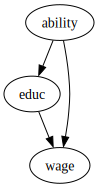

In [9]:
g = gr.Digraph()

g.edge("ability", "educ")
g.edge("ability", "wage")
g.edge("educ", "wage")
g

이러한 상황을 피할 수 있는 한 가지 방법은 교육이 임금에 주는 영향을 측정할 때 일정한 수준의 역량 변수를 통제하는 것.

하지만 여기서 문제는 '역량'을 측정할만한 좋은 척도가 없다는 것이다.

이를 해결하기 위해 도구변수(Instrumental Variable)를 활용할 수 있다.

도구변수의 아이디어는 처치(T)변수를 유발하는 다른 변수를 찾는 것에서부터 시작되며, 도구변수는 처치를 통한 결과(Y)와만 상관관계가 있어야 한다.

다르게 말하자면, 도구변수($Z_i$)는 $Y_0$와는 상관관계가 성립하지 않으면서 $T$와의 상관관계는 성립해야 한다.

이것을 Exclusion Restriction(제외 제한)이라고 표현한다.

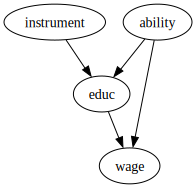

In [10]:
g = gr.Digraph()

g.edge("ability", "educ")
g.edge("ability", "wage")
g.edge("educ", "wage")
g.edge("instrument", "educ")

g

우리가 이러한 도구변수(IV)가 있다면, 아래의 도구변수(IV) equation에 따라 인과 효과 ($\kappa$)를 밝힐 수 있을 것이다.

처치를 $T$, 교란변수를 $W$라 하자.

$Y_i = \beta_0 + \kappa T_i + \beta W_i + v_i$

그러나 우리는 $W$에 대한 데이터가 없기 때문에

$Y_i = \beta_0 + \kappa\ T_i + v_i$

$v_i = \pmb{\beta}W_i + u_i$

$W$가 교란변수이기 때문에, $Cov(T,v) \neq 0$